**Executed:** Sun Jun  5 20:57:36 2016

**Duration:** 3 seconds.

# Direct ecitation coefficient fit

> *This notebook estracts the direct excitation coefficient from the set of 5 us-ALEX smFRET measurements.*

## What it does?

This notebook performs a weighted average of direct excitation coefficient fitted from each measurement.

## Dependencies

This notebooks reads the file:

In [1]:
data_file = 'results/usALEX-5samples-PR-raw-dir_ex_aa-fit-AexAem.txt'

The data has been generated by running the template notebook
[usALEX-5samples-PR-raw-dir_ex_aa-fit-AexAem](usALEX-5samples-PR-raw-dir_ex_aa-fit-AexAem.ipynb)
for each sample.

To recompute the PR data used by this notebook run the 
[8-spots paper analysis](8-spots paper analysis.ipynb) notebook.

## Computation

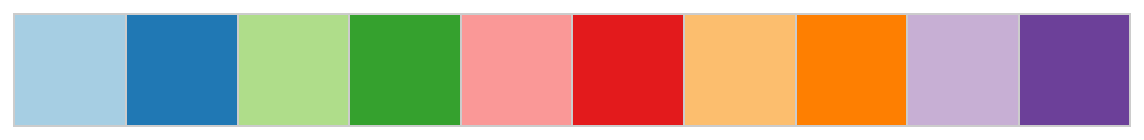

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'  # for hi-dpi displays

sns.set_style('whitegrid')
palette = ('Paired', 10)
sns.palplot(sns.color_palette(*palette))
sns.set_palette(*palette)

In [3]:
data = pd.read_csv(data_file, sep="\s+").set_index('sample')
data

,n_bursts_aa,dir_ex_S1p,dir_ex_S_kde,dir_ex_S2p,dir_ex_S2pa,dir_ex_S2p_w1,dir_ex_S_kde_w1,dir_ex_S_kde_w4,dir_ex_S_kde_w5,dir_ex_S2p_w5,dir_ex_S2p_w5a
sample,,,,,,,,,,,
7d,630,0.035049,0.061121,0.068715,0.060454,0.065912,0.060895,0.055075,0.053741,0.055369,0.050042
12d,269,0.037100,0.060445,0.092479,0.041670,0.073575,0.060445,0.057082,0.054852,0.057560,0.044884
17d,608,0.034677,0.083424,0.119491,0.070370,0.094961,0.082720,0.077354,0.071352,0.072895,0.174377
22d,433,0.026463,0.086484,0.111094,0.053768,0.082611,0.085541,0.071582,0.064283,0.061879,0.046918
27d,129,0.019777,0.050862,0.078734,0.040582,0.080239,0.050420,0.074807,0.043406,0.055485,0.017062


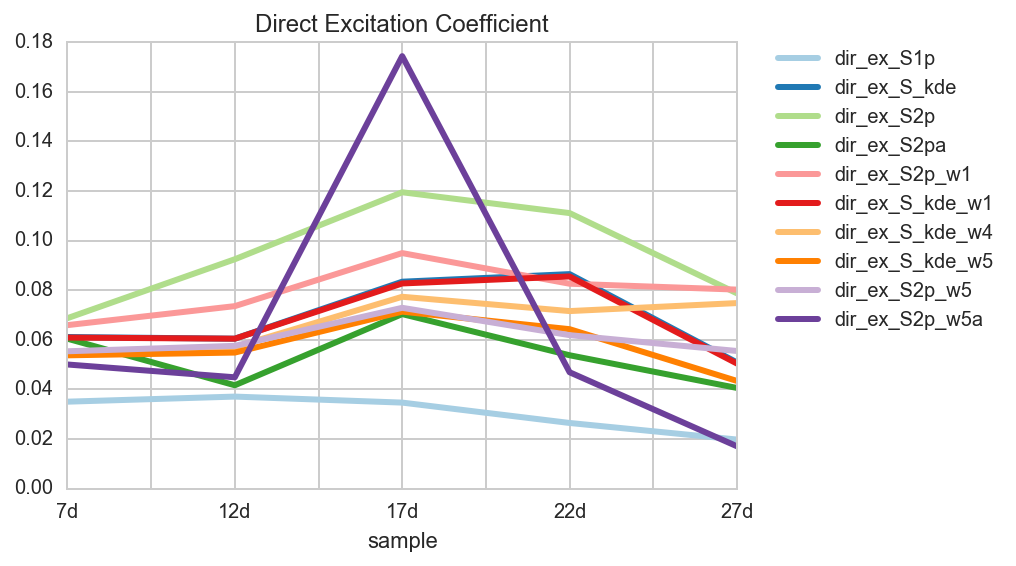

In [4]:
d = data[[c for c in data.columns if c.startswith('dir')]]
d.plot(kind='line', lw=3, title='Direct Excitation Coefficient')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False);

In [5]:
dir_ex_aa = np.average(data.dir_ex_S_kde_w5, weights=data.n_bursts_aa)
'%.5f' % dir_ex_aa

'0.06062'

## Save coefficient to disk

In [6]:
with open('results/usALEX - direct excitation coefficient dir_ex_aa.txt', 'w') as f:
    f.write('%.5f' % dir_ex_aa)